# Hope Conover Notebook - Custom Exploratory Data Analysis (EDA) Project

- Author: [Hope Conover](https://github.com/hopeconover/)
- Repository: [datafun-06-eda](https://github.com/hopeconover/datafun-06-eda/)
- Purpose: To perform a custom EDA poject and present data stories by narrating the process
- Date: 2026-02

## Dataset Information

- Dataset: Housing Prices
- Description:  A regression dataset designed to predict housing prices based on structural and locational attributes such as house area, number of bedrooms, furnishing status, and proximity to main roads. The dataset presents challenges due to multicollinearity among predictors.
- Source: [Housing.csv][def]
- Original Collection: The original collection source is not explicitly documented. The dataset was made publicly available via Kaggle for educational and regression modeling purposes.
- Citation:  Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102. Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.
- Access: Publicly available via Kaggle at https://www.kaggle.com/datasets/yasserh/housing-prices-dataset
 (accessed February 2026).

This is a Markdown cell.

[def]: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset/

## Section 1. Project Setup and Imports

All imports and configuration appear once, at the top of the notebook.

WHY:
- Keeps notebooks readable and reproducible
- Mirrors professional scripts
- Makes it clear what must be installed

This is a Markdown cell.

In [1]:
# This is a Python cell.

# Imports at the top of the file
# REQ.EXTERNAL.DEPS: External packages must be defined in pyproject.toml
# REQ.EXTERNAL.DEPS.INSTALLED: external packages must be installed in the environment using uv sync command
# REQ.EXTERNAL.DEPS.IMPORTED: external packages used in this notebook must be imported here

from matplotlib.axes import Axes
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from datafun_06_eda.eda_conover import make_clean_view

# Type hint for Axes object (basic plot type returned by Seaborn)
# A seaborn plot is a set of axes and you can set the title, labels, etc. on the axes.

# A figure can contain multiple axes (plots)
# from matplotlib.figure import Figure

# To see the list of available datasets in seaborn
# import seaborn as sns
# print(sns.get_dataset_names())

# Pandas display configuration (helps in notebooks)
pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)

print("Imports complete.")

Imports complete.


## Section 2. Load the Data

WHY: Before analysis, load the data to confirm:

- The dataset loads successfully
- The structure matches expectations
- Column names are available and readable

This is a Markdown cell.

In [2]:
# Section 2 Python cell

# Load the housing prices dataset from Kaggle (or any dataset you have)
# Into a pandas DataFrame (2D table)
housing_df: pd.DataFrame = pd.read_csv("housing.csv")

# Preview the first few rows
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Section 3. Create Clean View for EDA

WHY: We often want to work with complete data for visualizations and statistics.

Strategy:
- Keep the original DataFrame unchanged
- Create a separate clean view by dropping rows with missing values

This is a Markdown cell.

In [3]:
# Create cleaned dataframe view (removing rows with missing values)
df_clean: pd.DataFrame = make_clean_view(housing_df)

2026-02-21 13:30:51 | INFO | EDA | Creating cleaned view for EDA (dropping rows with key missing values)
2026-02-21 13:30:51 | INFO | EDA | Cleaned view shape: 545 rows, 13 columns


## Section 4. Inspect Data Shape and Structure

WHY: First, understand the shape (basic structure) of the data:

- How many rows and columns are there?
- What types of data are present?
- Are there obvious missing values?

This step determines challenges we might have downstream (later).

This is a Markdown cell.

In [4]:
# Section 4 Python cell

# Get shape - number of rows and columns
shape: tuple[int, int] = df_clean.shape

# Communicate the shape clearly
print(f"The housing dataset has {shape[0]} rows and {shape[1]} columns.")

# Display column names and data types
housing_df.info()

# List the column names
print("Column names:")
print(list(housing_df.columns))

# Count missing values in each column
print("Missing values per column:")
print(housing_df.isnull().sum())

# Check for duplicate rows
num_duplicates = housing_df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

The housing dataset has 545 rows and 13 columns.
<class 'pandas.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    str  
 6   guestroom         545 non-null    str  
 7   basement          545 non-null    str  
 8   hotwaterheating   545 non-null    str  
 9   airconditioning   545 non-null    str  
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    str  
 12  furnishingstatus  545 non-null    str  
dtypes: int64(6), str(7)
memory usage: 55.5 KB
Column names:
['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditi

## Section 5. Create Data Dictionary and Check Data Quality

WHY: Missing data is normal. We need to find out how much and where.

Missing data affects:

- Visualizations
- Summary statistics
- Machine learning models

LOOK FOR: 

- Columns with many missing values
- Patterns (entire rows missing multiple fields)

This is a Markdown cell.


## Section 5. Create Clean View for EDA

WHY: We often want to work with complete data for visualizations and statistics.

Strategy:
- Keep the original DataFrame unchanged
- Create a separate clean view by dropping rows with missing values

This is a Markdown cell.

In [5]:
# Section 5 Python cell

# Create a clean view by dropping rows with any missing values
df_clean: pd.DataFrame = housing_df.dropna()

# Compare sizes
print(f"Original dataset: {len(housing_df)} rows")
print(f"Clean dataset: {len(df_clean)} rows")
print(f"Rows removed: {len(housing_df) - len(df_clean)}")

Original dataset: 545 rows
Clean dataset: 545 rows
Rows removed: 0


## Section 6. Descriptive Statistics for Numeric Columns

WHY: Summary statistics give us a quick overview of the numeric data:

- Central tendency (mean)
- Spread (std, min, max)
- Distribution shape (quartiles)

This is a Markdown cell.

In [6]:
# Section 6 Python cell

# Summary statistics for numeric columns
df_clean.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
# Section 6 Python cell

# AND/OR Calculate statistics for a specific column with numpy
# For example, let's calculate the mean and median of the 'price' column
price_mean: float = float(np.mean(df_clean["price"]))
price_median: float = float(np.median(df_clean["price"]))

print("Price Statistics (using numpy):")
print(f"  Mean: ${price_mean:.2f}")
print(f"  Median: ${price_median:.2f}")

Price Statistics (using numpy):
  Mean: $4766729.25
  Median: $4340000.00


## Section 7. Correlation Matrix for Numeric Columns

WHY: Correlation tells us how numeric variables relate to each other.

- Values near 1 or -1 indicate strong relationships
- Values near 0 indicate weak or no linear relationship

This is a Markdown cell.

In [8]:
# Section 7 Python cell

# Select only numeric columns and compute correlation
numeric_cols = df_clean.select_dtypes(include="number")
correlation_matrix = numeric_cols.corr()
print(correlation_matrix)

              price      area  bedrooms  bathrooms   stories   parking
price      1.000000  0.535997  0.366494   0.517545  0.420712  0.384394
area       0.535997  1.000000  0.151858   0.193820  0.083996  0.352980
bedrooms   0.366494  0.151858  1.000000   0.373930  0.408564  0.139270
bathrooms  0.517545  0.193820  0.373930   1.000000  0.326165  0.177496
stories    0.420712  0.083996  0.408564   0.326165  1.000000  0.045547
parking    0.384394  0.352980  0.139270   0.177496  0.045547  1.000000


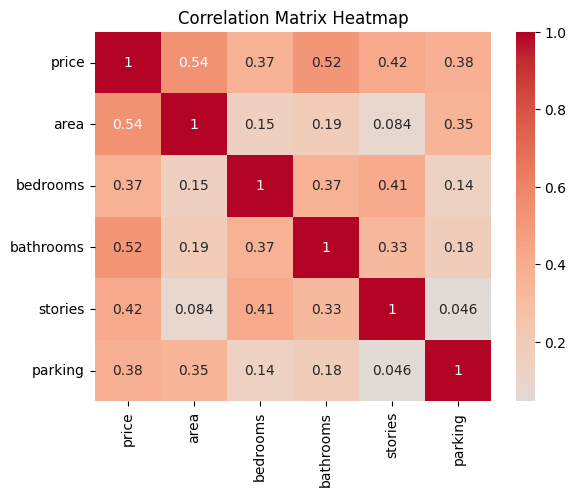

In [9]:
# Section 7 Python cell

# Visualize the correlation matrix as a heatmap
# Set annotations to True to show correlation values
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix Heatmap")
plt.show()


Use Markdown cells to narrate and tell the story as you explore.

Interpretation:

 - Values close to 1 (dark red) = strong positive correlation (both increase together)
 - Values close to -1 (dark blue) = strong negative correlation (one increases, other decreases)
 - Values close to 0 (white) = little or no linear relationship
 - The diagonal is always 1 (each variable correlates perfectly with itself)

From this heatmap, we can see that **price** and **area** shows a moderate to strong positive correlation (~0.54).

This is a Markdown cell.

## Section 8. Make Plots

WHY: Visualizations reveal patterns not obvious in tables.

Create:
1. A scatter plot to see relationships between two variables
2. A box plot to compare distributions across groups

This is a Markdown cell.

Text(0.5, 1.0, 'Price vs. Area (by Bedrooms)')

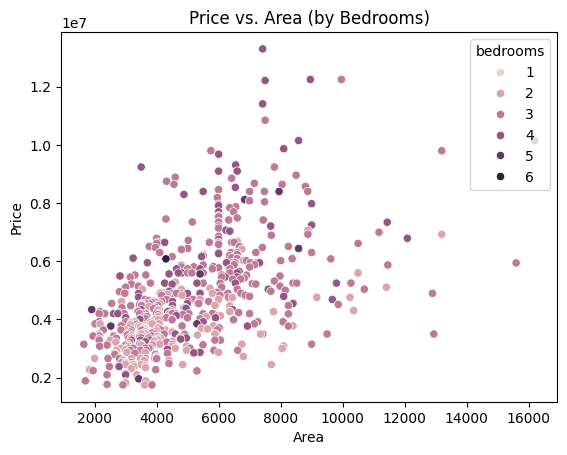

In [10]:
# Section 8 Python cell - use "Run All" so prior cells are executed first.

# Create a scatter plot to visualize the relationship between two numeric variables, colored by a categorical variable
# We need to know our dataset column names so we can use them to set x, y, and hue (color)
scatter_plt: Axes = sns.scatterplot(data=df_clean, x="area", y="price", hue="bedrooms")

scatter_plt.set_xlabel("Area")
scatter_plt.set_ylabel("Price")
scatter_plt.set_title("Price vs. Area (by Bedrooms)")

# Run by clicking Run All in the Menu up top

<Figure size 640x480 with 0 Axes>

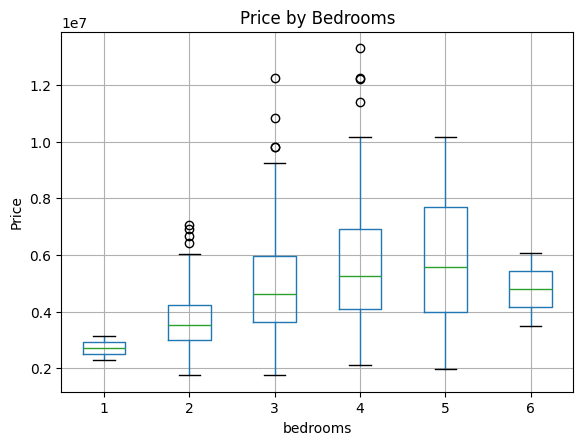

In [11]:
# Section 8 Python cell - use "Run All" so prior cells are executed first.

# Create a boxplot of price vs bedrooms

plt.figure()
df_clean.boxplot(column="price", by="bedrooms")
plt.title("Price by Bedrooms")
plt.suptitle("")  # removes automatic subtitle
plt.ylabel("Price")
plt.show()

## Section 9. Reminder: Run All before sending to GitHub

Before saving a notebook (and running git add-commit-push), click 'Run All' to generate all outputs and display them in the notebook. 

This is a Markdown cell.
